1. Data Preparation 🎭

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #visualization
import seaborn as sns  
import warnings #ignore warnings 
warnings.filterwarnings("ignore")

In [2]:
#Read datasets
df = pd.read_csv('data_set/ratings_small.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
#basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
df.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [5]:
#check nulls and duplicates
print(df.isnull().sum())
print(df.duplicated().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
0


In [6]:
print(len(df['userId'].unique()))
print(len(df['movieId'].unique()))

671
9066


2. Exploratory Data Analysis 🎬

We will visualize features to understand the distribution of each feature or find correlation between them

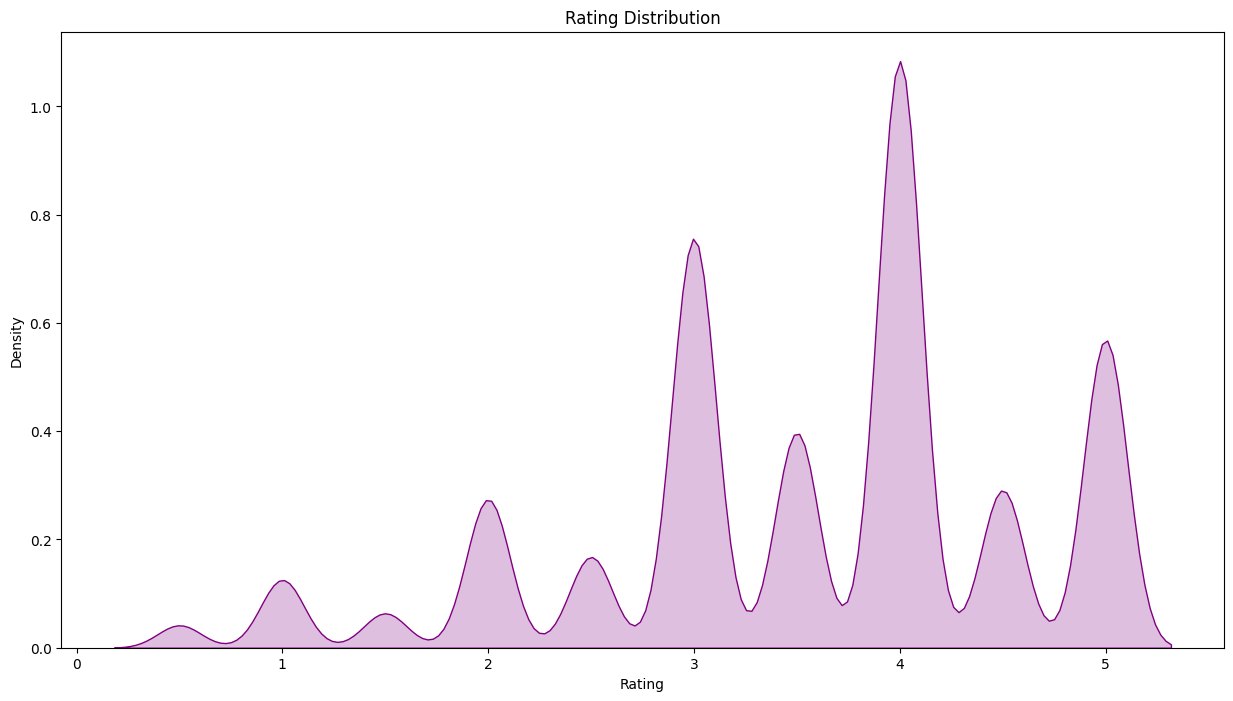

In [7]:
#show rating distribution with KDE plot

#set figure size
plt.figure(figsize=(15,8))

#create KDE plot
sns.kdeplot(x='rating', data=df, fill=True , color='purple')

#set-up plot
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Density')

plt.show()

Movie Rating Distribution:

The Graph shows the distribution of movie ratings in our dataset. The X-Axis represents possible movie ratings & Y-Axis represents density of ratings. Density is a fancy word to say, how many movies receives a specific ratings. The higher curve at a particular rating, the more movies in dataset received ratings

Observation:

. The graph reveals Skewed right. This suggest that most of the movies ratings density lies between 2.2 to 4.5 

. The peak density curve is at 1.2 which indicates most density in dataset is positive

<Axes: title={'center': 'Rating Distribution among Timestamp'}, xlabel='Timestamp', ylabel='Rating'>

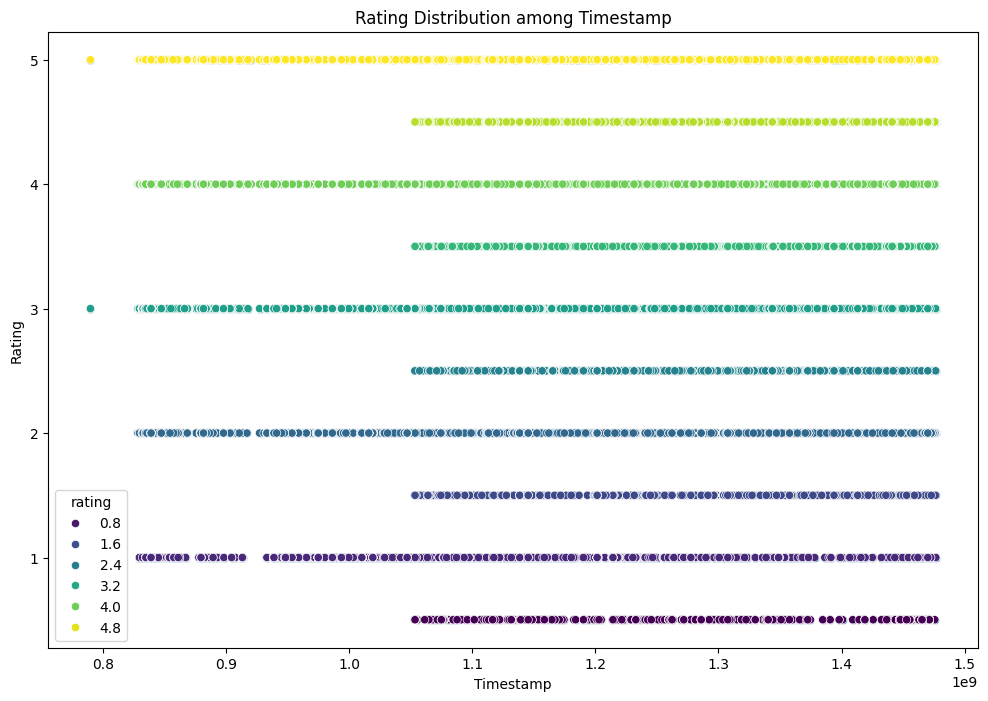

In [8]:
#Find corerealtion between rating and timestamp

#set figure size
plt.figure(figsize=(12,8))

#Create scatter plot
sns.scatterplot(x='timestamp', y='rating', data=df)

#set-up plot
plt.title('Rating Distribution among Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Rating')  

#set the color of points
sns.scatterplot(x='timestamp', y='rating', data=df,hue='rating', palette='viridis')

Positive Correlation Between Timestamp and Ratings:

. The x-axis likely represents the timestamp when a movie was rated, while the y-axis represents the average rating for movies rated at that time.

. The generally increasing slope suggests that as the timestamp increases (i.e., as time goes on), the average movie rating also increases.

Possible explanations for the positive correlation:

. Selection bias: Newer movies might be more popular or anticipated than older ones, leading to higher ratings. This can happen because popular actors or directors are involved, or because the movie is part of a successful franchise.

. Rating inflation: Over time, moviegoers may tend to give out higher ratings overall. This could be because they are exposed to more movies and their standards change, or because rating scales are not adjusted to account for changing preferences.

In [9]:
#Drop timestamp because no corellation found
df = df.drop(columns='timestamp')
df.head(3)

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0


In [10]:
#Calculate the mean rating for each user
mean_ratings = df.groupby('userId')['rating'].mean()

#Pick users with lowest and highest mean rating
low_ratings = mean_ratings.sort_values().head()
high_ratings = mean_ratings.sort_values(ascending=False).head()
high_ratings

userId
46     4.948718
443    4.850000
298    4.800000
448    4.750000
622    4.725806
Name: rating, dtype: float64

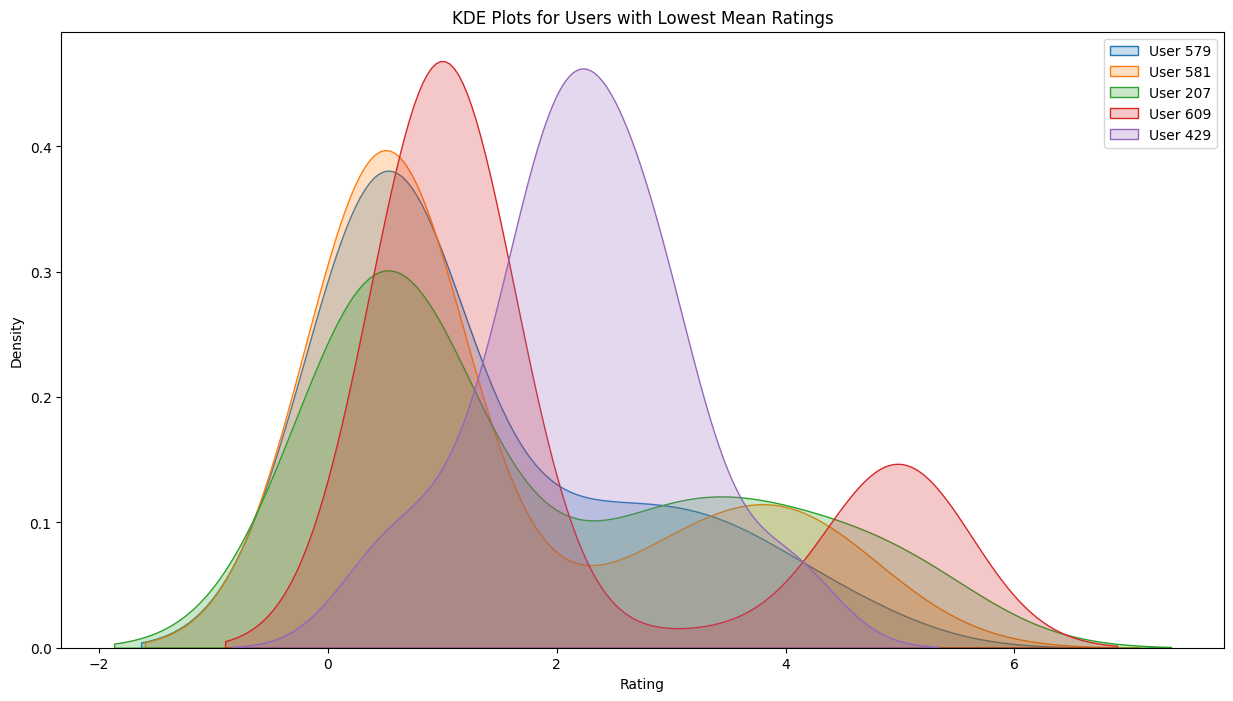

In [11]:
# Create KDE plots for the top 5 users with low ratings
plt.figure(figsize=(15, 8))
for user_id in low_ratings.index:
    user_data = df[df['userId'] == user_id]
    sns.kdeplot(x='rating', data=user_data, shade=True, label=f'User {user_id}')

# Set-up plot
plt.title('KDE Plots for Users with Lowest Mean Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

Observations

. The x-axis represents the possible movie ratings, ranging from low ratings on the left to high ratings on the right.

. The y-axis represents the density of ratings. The higher the curve at a particular rating value, the more movies those users with the lowest mean ratings tended to give that rating.



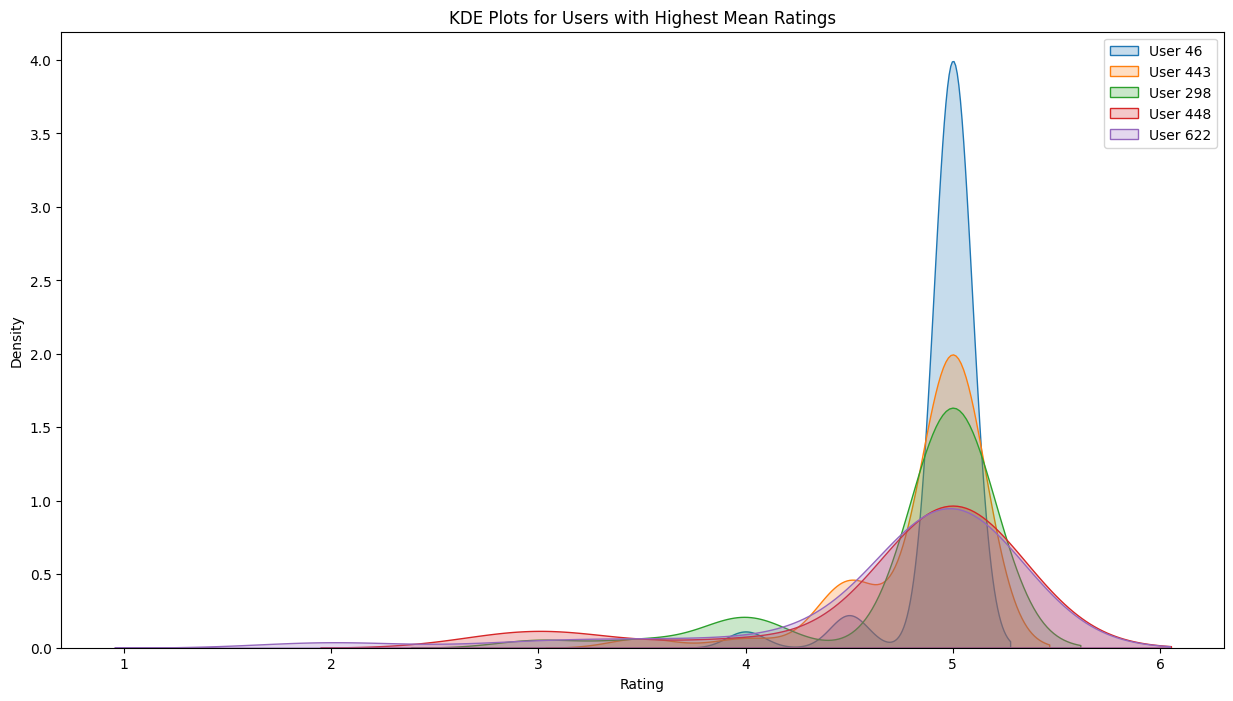

In [12]:
# Create KDE plots for the top 5 users with high ratings
plt.figure(figsize=(15, 8))
for user_id in high_ratings.index:
    user_data = df[df['userId'] == user_id]
    sns.kdeplot(x='rating', data=user_data, shade=True, label=f'User {user_id}')

# Set-up plot
plt.title('KDE Plots for Users with Highest Mean Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

Background

The dataset used in this analysis is a movie rating dataset, which contains ratings given by users to various movies. The goal of this analysis is to explore the distribution of movie ratings, identify patterns and correlations, and gain insights into user behavior.

Dataset Description

The dataset consists of three columns: userId, movieId, and rating. The userId column represents the unique identifier for each user, the movieId column represents the unique identifier for each movie, and the rating column represents the rating given by the user to the movie. The timestamp column, which represents the time when the rating was given, was initially included but was later dropped due to a lack of correlation with the rating.

Key Findings and Insights

1. Rating Distribution: The rating distribution is skewed to the right, with most ratings falling between 2.2 and 4.5. The peak density curve is at 1.2, indicating that most ratings are positive.

2. Positive Correlation between Timestamp and Ratings: There is a positive correlation between the timestamp and ratings, suggesting that as time goes on, the average movie rating increases. This could be due to selection bias, where newer movies are more popular or anticipated, or rating inflation, where moviegoers tend to give out higher ratings over time.

3. User Behavior: The analysis of users with the lowest and highest mean ratings reveals distinct patterns. Users with low mean ratings tend to give lower ratings overall, while users with high mean ratings tend to give higher ratings. This suggests that users have different rating patterns and preferences.

4. User Segmentation: The KDE plots for users with low and high mean ratings show that users can be segmented based on their rating behavior. This segmentation can be useful for personalized recommendation systems or targeted marketing campaigns.

Insights

1. Rating Inflation: The positive correlation between timestamp and ratings suggests that rating inflation may be a factor in the dataset. This could be due to changes in user preferences or the increasing quality of movies over time.

2. User Preferences: The analysis of user behavior and rating patterns suggests that users have different preferences and biases when it comes to rating movies. This could be used to develop more accurate recommendation systems or to identify niche audiences.

3. Movie Quality: The rating distribution and user behavior suggest that movie quality may be improving over time, leading to higher ratings. This could be due to advances in filmmaking technology, changes in audience preferences, or the increasing popularity of certain genres.

Recommendations

1. Control for Rating Inflation: To account for rating inflation, it may be necessary to adjust the rating scale over time or to use a more robust rating system.

2. Personalized Recommendations: The segmentation of users based on their rating behavior could be used to develop more accurate and personalized recommendation systems.

3. Movie Quality Analysis: Further analysis of the dataset could be used to identify trends in movie quality and to develop more accurate metrics for evaluating movie performance.